## Machine Learning INTERN @BHARAT INTERN
## AUTHOR : MADDALI LAKSHMI MYTRAYEE

# TASK 1 : House Price Prediction Using Linear Regression
### PURPOSE : TO PREDICT THE HOUSE PRICE.
## STEPS INVOLVED :
#### 1. IMPORTING LIBRARIES AND DATA TO BE USED
#### 2. Data Preprocessing
#### 3. CORRELATION BETWEEN THE COLUMNS
#### 4. Exploratory data analysis (EDA)
#### 5. Spliting The Dataset
#### 6. Linear Regression
#### 7. Evaluation

In [1]:
#Import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

from google.colab import files
data = files.upload()

data= pd.read_csv("Housing.csv")

Saving Housing.csv to Housing.csv


In [3]:
# Data cleaning: Check for missing values and handle them
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

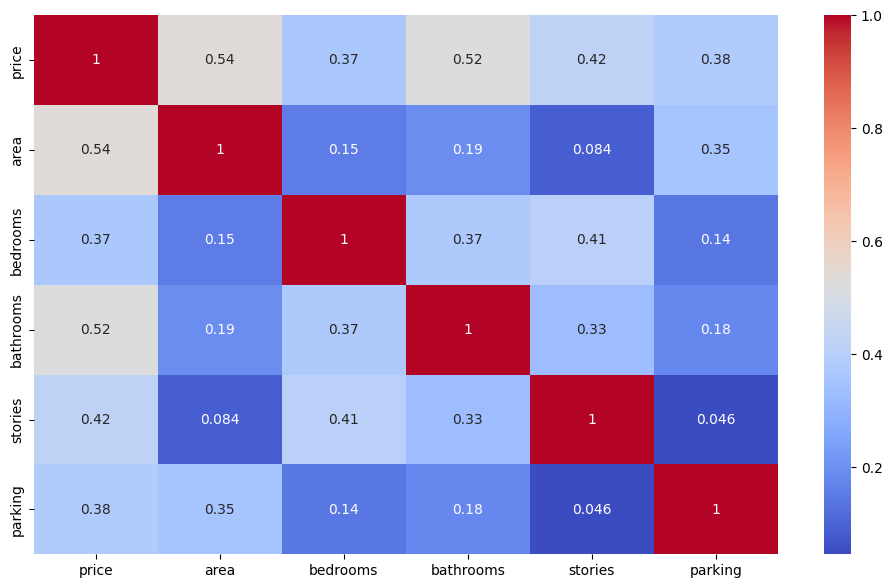

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Alternatively, you can convert non-numeric values to NaN and then drop them
# numeric_data = data.apply(pd.to_numeric, errors='coerce').dropna()
corr = numeric_data.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


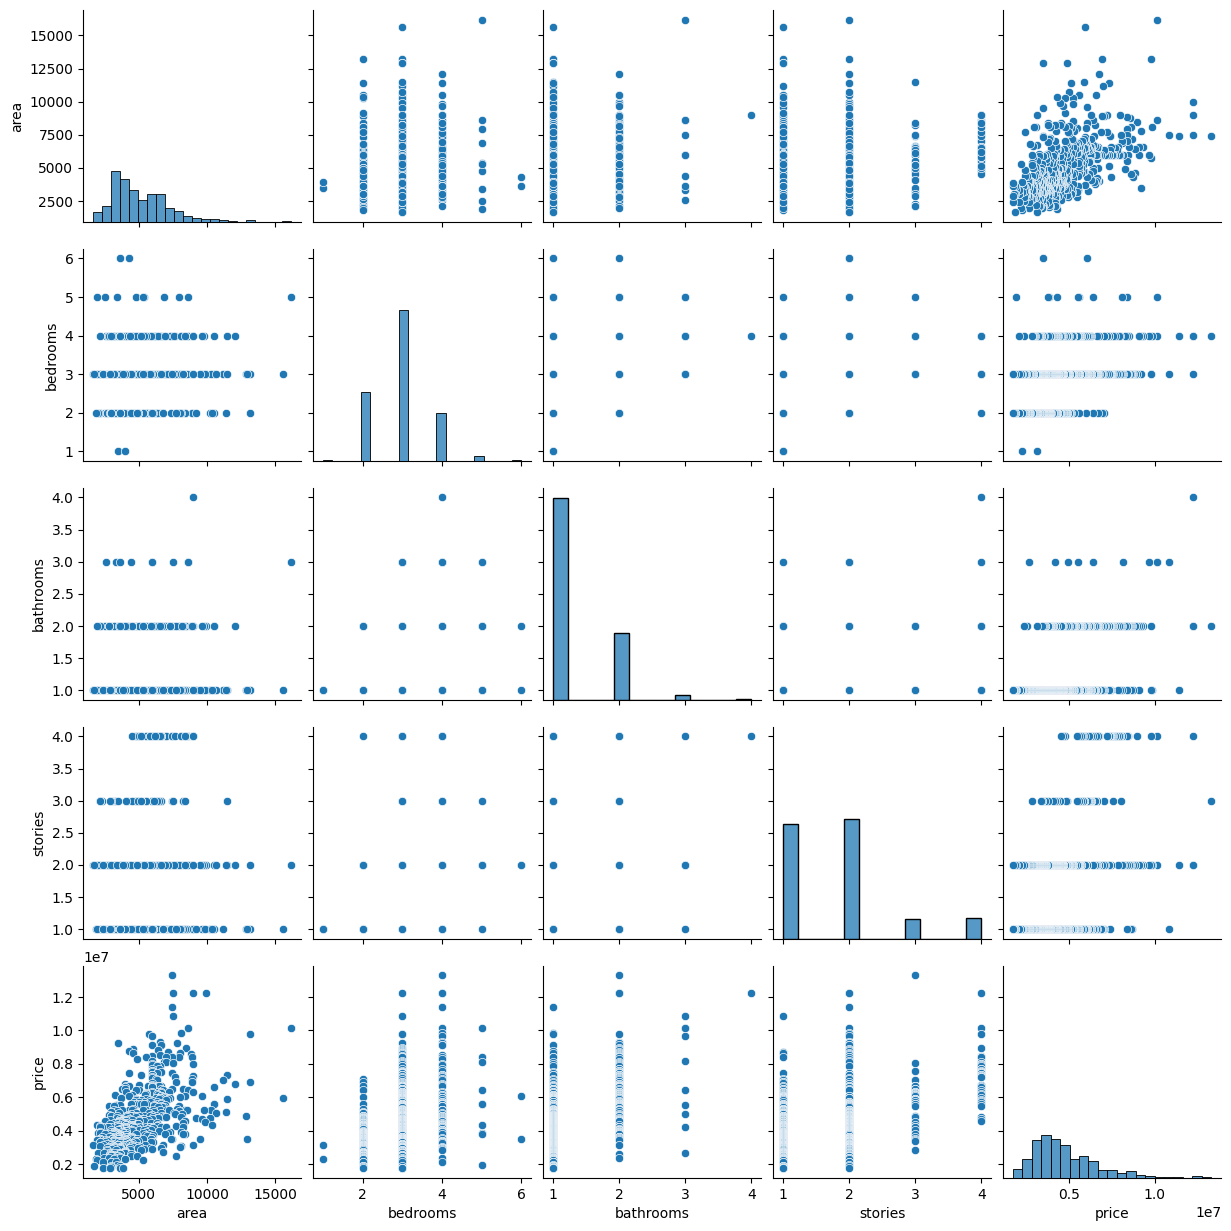

In [5]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame and 'price' is the target variable
numerical_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(data[numerical_vars], kind='scatter')
plt.show()


In [6]:
import plotly.express as px
# Assuming 'data' is your DataFrame and 'price' is the target variable
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    fig = px.box(data, x=col, y='price')
    fig.update_layout(title=f"{col.capitalize()} vs. Price", xaxis_title=col.capitalize(), yaxis_title='Price')
    fig.show()


In [7]:
import plotly.express as px

fig = px.box(data, x='furnishingstatus', y='price')
fig.update_layout(title='Furnishing Status vs. Price', xaxis_title='Furnishing Status', yaxis_title='Price')
fig.show()


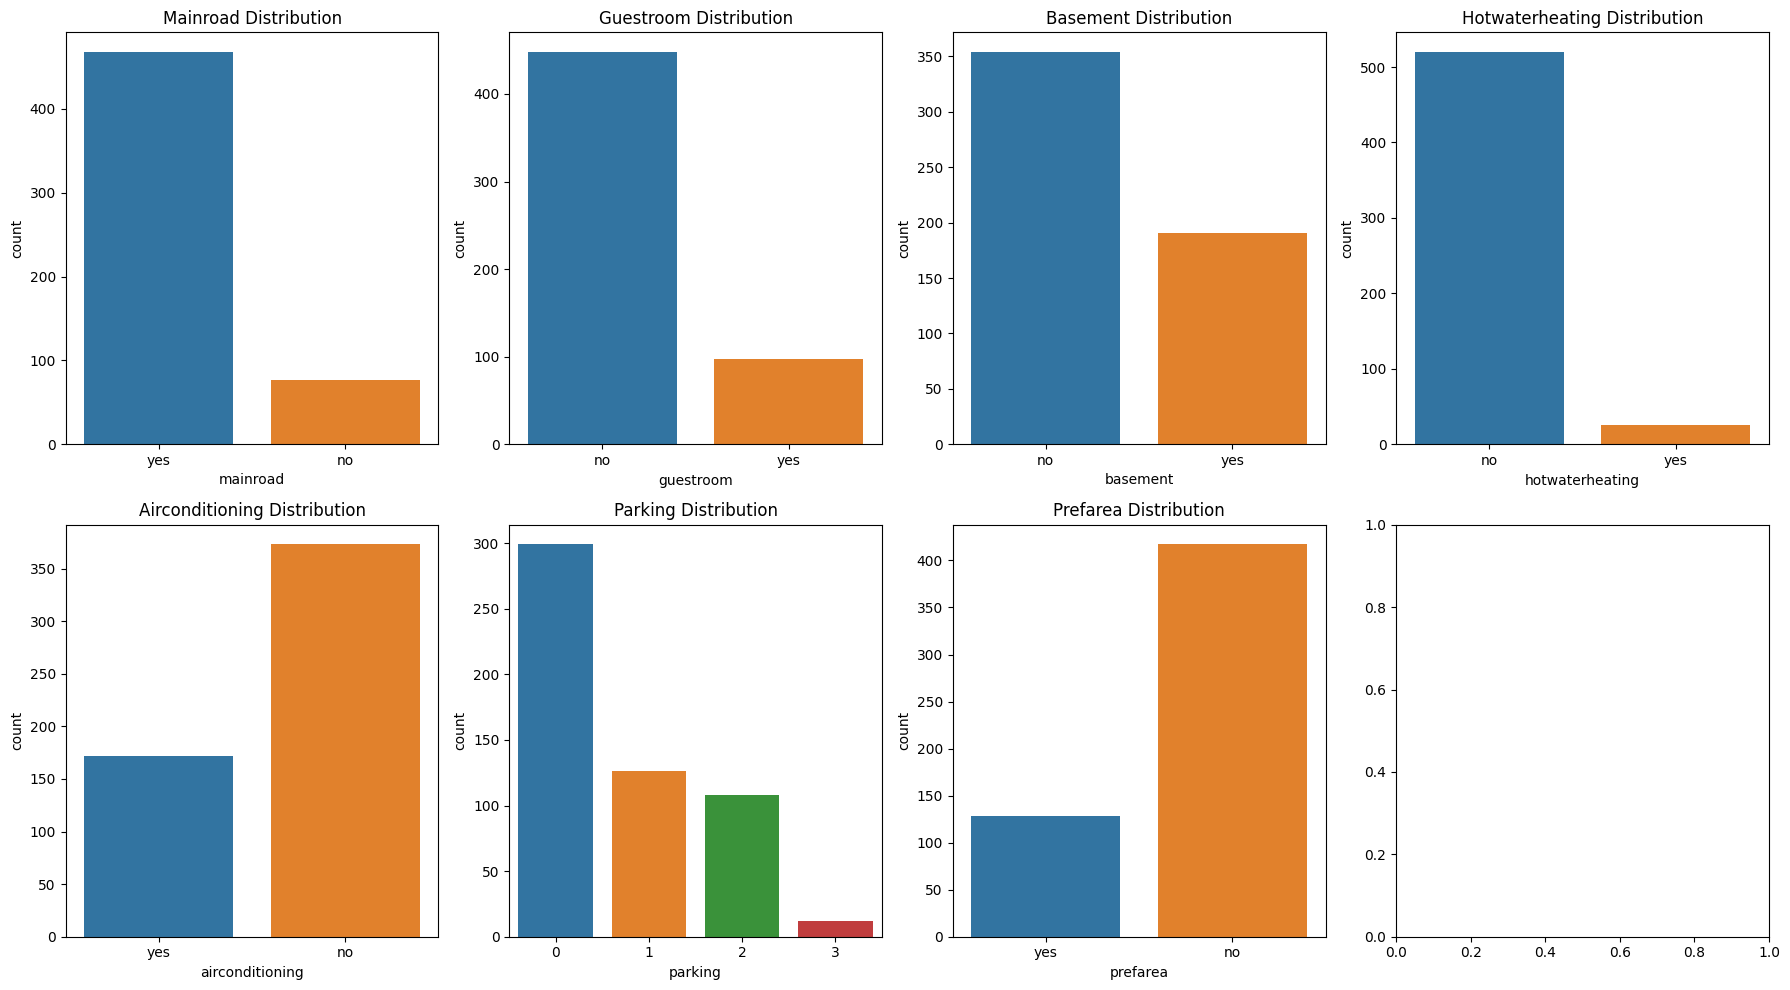

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the binary categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
# Setting up subplots to display count plots for each binary variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=data, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'{col.capitalize()} Distribution')

plt.tight_layout()
plt.show()


In [9]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# Split the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Linear Regression model
model = LinearRegression()

In [12]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict on the test data
y_pred = model.predict(X_test)

In [14]:
# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 1739553620722.75
R-squared: 0.6558453961589386
